<a href="https://colab.research.google.com/github/syhamham/AWA-Project/blob/main/wind1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 풍량 - 비교존

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

ds            y
0 2023-09-25 09:55:00  7592.000000
1 2023-09-25 09:56:00  7548.000000
2 2023-09-25 09:59:00  7775.000000
3 2023-09-25 10:00:00  7652.666667
4 2023-09-25 10:01:00  7556.333333

In [3]:
df.tail()

ds       y
38281 2023-10-23 11:38:00  7228.5
38282 2023-10-23 11:39:00  7559.0
38283 2023-10-23 11:40:00  7592.5
38284 2023-10-23 11:41:00  7610.5
38285 2023-10-23 11:42:00  7335.0

In [4]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp177sq3kb/us243fs8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp177sq3kb/uikqfb_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85937', 'data', 'file=/tmp/tmp177sq3kb/us243fs8.json', 'init=/tmp/tmp177sq3kb/uikqfb_s.json', 'output', 'file=/tmp/tmp177sq3kb/prophet_model964k62tn/prophet_model-20240514071111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=60, freq='1min')
future.tail(60)

ds
38286 2023-10-23 11:43:00
38287 2023-10-23 11:44:00
38288 2023-10-23 11:45:00
38289 2023-10-23 11:46:00
38290 2023-10-23 11:47:00
38291 2023-10-23 11:48:00
38292 2023-10-23 11:49:00
38293 2023-10-23 11:50:00
38294 2023-10-23 11:51:00
38295 2023-10-23 11:52:00
38296 2023-10-23 11:53:00
38297 2023-10-23 11:54:00
38298 2023-10-23 11:55:00
38299 2023-10-23 11:56:00
38300 2023-10-23 11:57:00
38301 2023-10-23 11:58:00
38302 2023-10-23 11:59:00
38303 2023-10-23 12:00:00
38304 2023-10-23 12:01:00
38305 2023-10-23 12:02:00
38306 2023-10-23 12:03:00
38307 2023-10-23 12:04:00
38308 2023-10-23 12:05:00
38309 2023-10-23 12:06:00
38310 2023-10-23 12:07:00
38311 2023-10-23 12:08:00
38312 2023-10-23 12:09:00
38313 2023-10-23 12:10:00
38314 2023-10-23 12:11:00
38315 2023-10-23 12:12:00
38316 2023-10-23 12:13:00
38317 2023-10-23 12:14:00
38318 2023-10-23 12:15:00
38319 2023-10-23 12:16:00
38320 2023-10-23 12:17:00
38321 2023-10-23 12:18:00
38322 2023-10-23 12:19:00
38323 2023-10-23 12:20:00
38324 2023-10-23 12:21:00
38325 2023-10-23 12:22:00
38326 2023-10-23 12:23:00
38327 2023-10-23 12:24:00
38328 2023-10-23 12:25:00
38329 2023-10-23 12:26:00
38330 2023-10-23 12:27:00
38331 2023-10-23 12:28:00
38332 2023-10-23 12:29:00
38333 2023-10-23 12:30:00
38334 2023-10-23 12:31:00
38335 2023-10-23 12:32:00
38336 2023-10-23 12:33:00
38337 2023-10-23 12:34:00
38338 2023-10-23 12:35:00
38339 2023-10-23 12:36:00
38340 2023-10-23 12:37:00
38341 2023-10-23 12:38:00
38342 2023-10-23 12:39:00
38343 2023-10-23 12:40:00
38344 2023-10-23 12:41:00
38345 2023-10-23 12:42:00

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
38341 2023-10-23 12:38:00  7391.175478  7263.213026  7513.547450
38342 2023-10-23 12:39:00  7391.030206  7268.866603  7515.858075
38343 2023-10-23 12:40:00  7390.885717  7256.071052  7515.836160
38344 2023-10-23 12:41:00  7390.742039  7267.473870  7527.721845
38345 2023-10-23 12:42:00  7390.599198  7261.556727  7520.926277

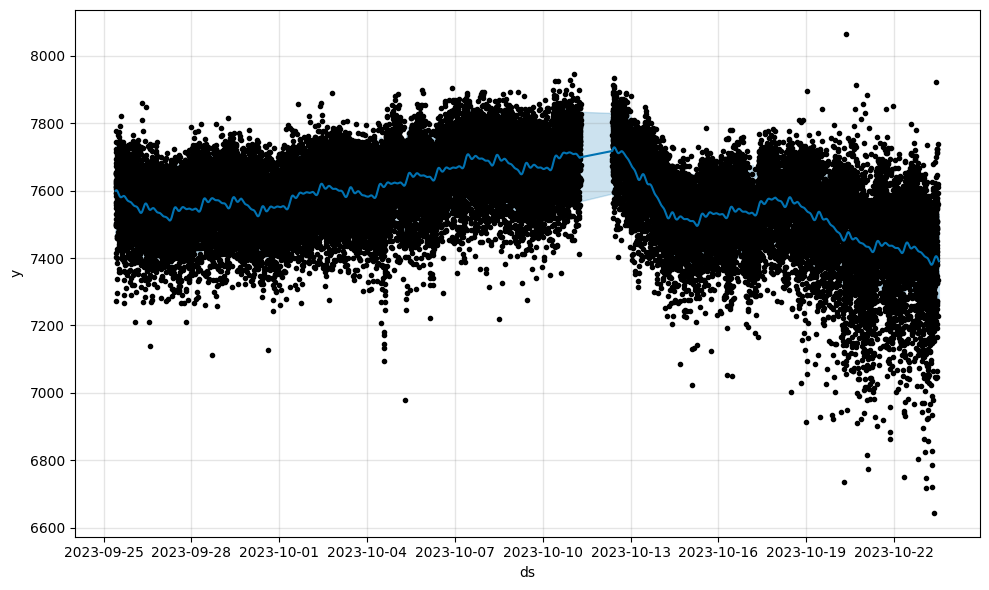

In [7]:
fig1 = m.plot(forecast)
fig1.show()

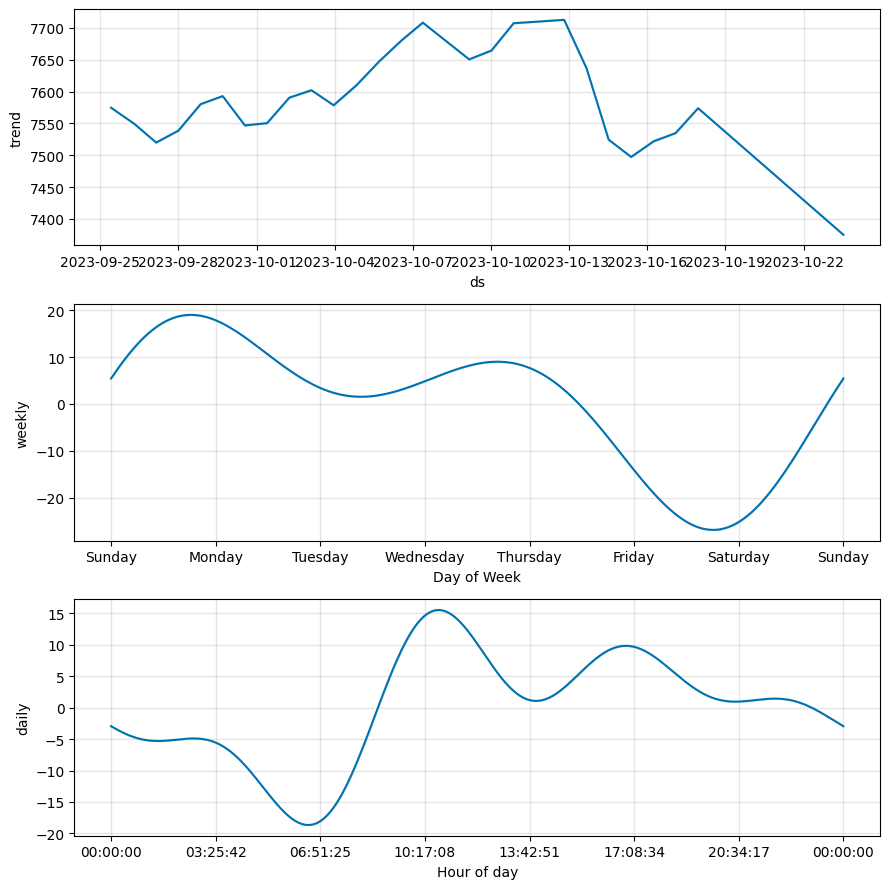

In [8]:
fig2 = m.plot_components(forecast)
fig2.show()

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)